In [1]:
import os
import pandas as pd
from ui_abattement_curve import cost_cumulated_emission_plots

In [2]:
folder = '20211104_184332/phebusreference'
path = os.path.join('output', folder)

performance_transition = 'A'
energy_transition = '2power'

carbon_value = pd.read_csv('input/abattement_curve/carbon_value.csv', index_col=[0], header=[0], squeeze=True)

In [3]:
scenarios = [s for s in os.listdir(path) if s.split('_')[0] == performance_transition and s.split('_')[1] == energy_transition]
scenarios_dict = {int(s.split('.')[0].split('_')[-1]): pd.read_csv(os.path.join(path, s), index_col=[0, 1, 2, 3, 4]) for s in scenarios}

In [4]:
year = 2018
attribute = 'Energy performance'

output = dict()
for year in range(2018, 2030):
    data = scenarios_dict[year]
    stock_total = data.loc[:, 'Dwelling number'].sum()
    data = data[data['Carbon cost (euro/tCO2)'] < carbon_value[year]]
    output[year] = data.loc[:, 'Dwelling number'].groupby(attribute).sum()

output = pd.DataFrame(output)

<AxesSubplot:>

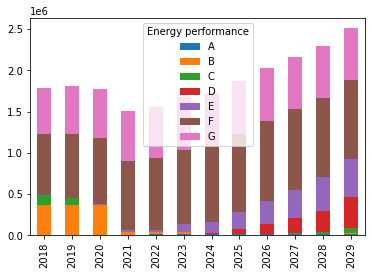

In [5]:
output.T.plot(kind='bar', stacked=True)

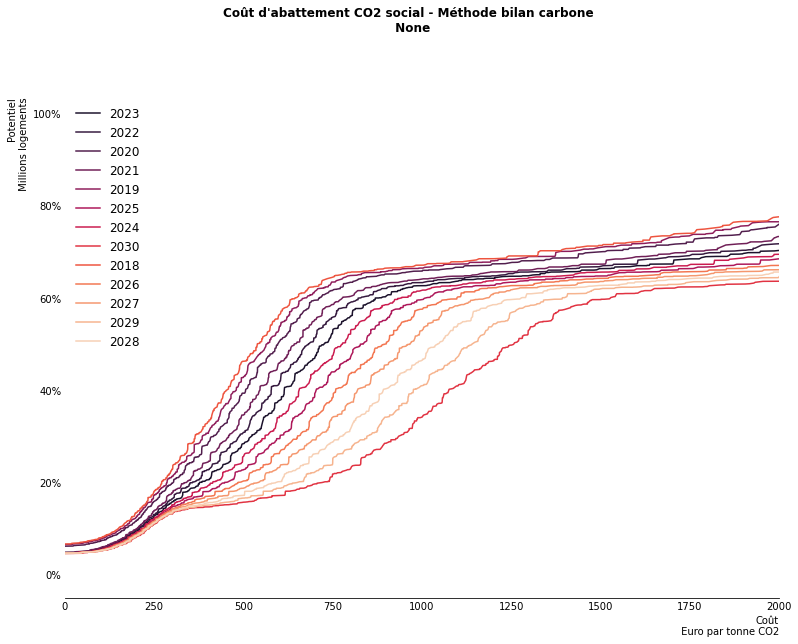

In [6]:
cost_cumulated_emission_plots(scenarios_dict,
                              graph='Cumulated dwelling number (%)')


In [25]:
str(2018).lower()

'2018'

In [27]:
carbon_value


Year
2018     54
2019     70
2020     87
2021    103
2022    119
2023    136
2024    152
2025    168
2026    185
2027    201
2028    217
2029    234
2030    250
2031    275
2032    300
2033    325
2034    350
2035    375
2036    400
2037    425
2038    450
2039    475
2040    500
2041    523
2042    546
2043    571
2044    596
2045    623
2046    651
2047    680
2048    711
2049    743
2050    775
Name: VAC, dtype: int64